In [1]:
# Importación de las librerías que necesitamos:

# Tratamiento de datos
# -----------------------------
import pandas as pd
import numpy as np

# Visualización
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# -----------------------------

#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración para visualizar todas las columnas de los DataFrames
# -----------------------------
pd.set_option('display.max_columns', None)

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

In [2]:
# Cargamos los csv y los pasamos a DataFrame para poder explorar los datos:

dfanalysis = pd.read_csv("files/Customer Flight Activity.csv")

dfanalysis.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
# Vamos a ver si hay duplicados para limpiar los datos

dfanalysis.duplicated().sum()

1864

Como hay duplicados los eliminamos, ya que no necesitamos los datos repetidos

In [4]:
dfanalysis.drop_duplicates(inplace=True)

    ## Comprobación de que ya no hay duplicados

dfanalysis.duplicated().sum()

0

In [5]:
# Vamos a revisar si hay valores nulos en nuestros datos

dfanalysis.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

Vemos que no hay ningún valor nulo en nuestro conjunto de datos


In [6]:
# Vamos a ver la forma de la tabla que tenemos:
dfanalysis.shape

(403760, 10)

Tenemos 403.760 filas en nuestro conjunto de datos del DataFrame "Analysis"

In [7]:
dfcustomer = pd.read_csv("files/Customer Loyalty History.csv")

dfcustomer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [8]:
# Vamos a ver si hay duplicados en la tabla

dfcustomer.duplicated().sum()

0

Vemos que no hay duplicados en nuestro conjunto de datos


In [9]:
# Vamos a revisar si hay valores nulos en nuestros datos

dfcustomer.isna().sum()[dfcustomer.isnull().sum() > 0]

Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [10]:
dfcustomer.isnull().sum()[dfcustomer.isnull().sum() > 0]/dfcustomer.shape[0]*100

Salary                25.321145
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

Vemos que hay valores nulos en las columnas "Salary" con un 25.3% aproximadamente, "Cancellation Year" y "Cancellation Month" con un 87.6% cada uno


In [11]:
# Vamos a ver la forma de la tabla que tenemos:
dfcustomer.shape

(16737, 16)

Tenemos 16.737 filas


---

Se ha observado que las dos tablas tienen en común el "Loyalty Number", por lo que vamos a correlacionar la información de ambas tablas en una sola. Así, vamos a poder trabajar con los datos.

In [12]:
# Unión de los dos DataFrames:

df = dfanalysis.merge(dfcustomer, on="Loyalty Number")

df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [13]:
df.shape

(403760, 25)

---
Homogeneización de los nombres de las columnas:

In [14]:
col_nueva = []

for col in df.columns:
    col_nueva.append(col.replace(" ", "_").lower())

df.columns = col_nueva

df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


---
Revisión de los estadísticos de nuestro DataFrame para explorar los valores que tenemos en conjunto

In [15]:
# Variables numéricas:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
flights_with_companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
total_flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
points_accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
points_redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


En el salario el mínimo es un valor negativo. Se entiende que esto habría que ponerlo en positivo:

In [16]:
df["salary"] = df["salary"].abs()

In [17]:
# Revisión de nuevo de los estadísticos del DataFrame para comprobar el mínimo del salario.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
flights_with_companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
total_flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
points_accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
points_redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


In [18]:
# Variables categóricas:

df.describe(include="object").T

,count,unique,top,freq
country,403760,1,Canada,403760
province,403760,11,Ontario,130258
city,403760,29,Toronto,80775
postal_code,403760,55,V6E 3D9,21944
gender,403760,2,Female,202757
education,403760,5,Bachelor,252567
marital_status,403760,3,Married,234845
loyalty_card,403760,3,Star,183745
enrollment_type,403760,2,Standard,380419


Podemos ver que todos nuestros clientes son de Canadá, por lo que podemos decir que el estudio se centra en ese país y podemos eliminar esa columna, ya que no es relevante

In [19]:
df.drop(columns = "country", inplace = True)

df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


---

### GESTIÓN DE NULOS

In [20]:
df.isna().sum()[df.isnull().sum() > 0]

salary                102260
cancellation_year     354110
cancellation_month    354110
dtype: int64

Volvemos a sacar el porcentaje de los valores nulos:

In [21]:
df.isna().sum()[df.isna().sum() > 0]/df.shape[0]*100

salary                25.326927
cancellation_year     87.703091
cancellation_month    87.703091
dtype: float64

"Salary"

---
En el caso de esta columna, podemos imputar los datos, pero vamos a hacer un boxplot para ver como de dispersos se encuentran los datos ya que en el estadístico vemos que hay diferencia entre el salario mínimo y el máximo

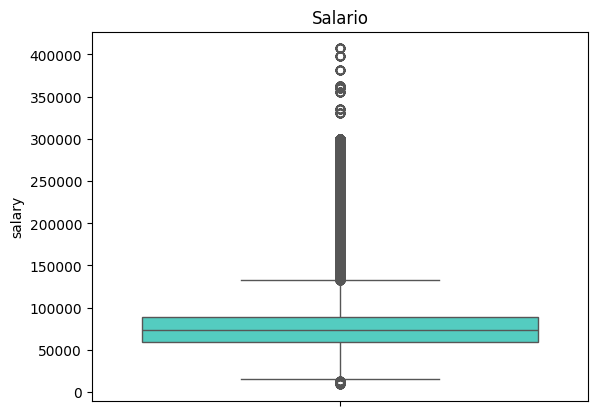

In [22]:
sns.boxplot(y = "salary", 
            data = df,
            color = "turquoise")
plt.title("Salario");

Se observa que hay muchos outliers, por lo que voy a ver si tiene algo que ver el nivel educativo, ya que disponemos de estos datos con el salario.

In [23]:
# Excluyo las filas con valores nulos para que no afecte al análisis:
df_nonull = df.dropna(subset=["education", "salary"])


In [24]:
# Mediana del salario por cada uno de los grupos:

mediana_salario_agrupada = df_nonull.groupby("education")["salary"].median()
print(mediana_salario_agrupada)


education
Bachelor                 71972.0
Doctor                  180440.0
High School or Below     61806.0
Master                  105487.0
Name: salary, dtype: float64


Voy a hacer un boxplot para ver si hay muchos outliers en función de cada nivel de educación

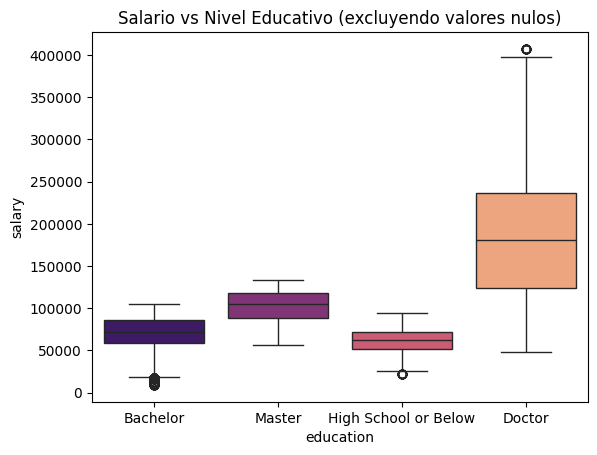

In [25]:
sns.boxplot(x="education", 
            y="salary", 
            data=df_nonull,
            palette = "magma")
plt.title("Salario vs Nivel Educativo (excluyendo valores nulos)");

Observo que los datos que corresponden a "College" no aparecen por algún motivo. Voy a ver las estadísticas por grupos

In [26]:
df.groupby("education")["salary"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,72599.080913,16667.675569,9081.0,58711.0,71972.0,85866.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,17731.0,178403.675202,70380.054033,48109.0,124407.0,180440.0,236612.0,407228.0
High School or Below,18915.0,61146.378165,12105.350590,21853.0,52054.0,61806.0,71344.0,93875.0
Master,12287.0,103734.523724,17518.492270,56414.0,88120.0,105487.0,118530.0,133080.0


Voy a aplicar un filtro para ver si los nulos solo pertenecen a la categoría "College"

In [27]:
otros_grupos = df[df["education"] != "College"]

otros_grupos["salary"].isna().sum()

0

No hay nulos en los demás grupos que no sean "College", por lo que voy a sustituir los valores nulos por 0 porque igual después necesito a estas personas para el análisis

In [28]:
df["salary"].fillna(0, inplace=True)


In [29]:
# Compruebo que se ha realizado correctamente

df.groupby("education")["salary"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,72599.080913,16667.675569,9081.0,58711.0,71972.0,85866.0,105563.0
College,102260.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Doctor,17731.0,178403.675202,70380.054033,48109.0,124407.0,180440.0,236612.0,407228.0
High School or Below,18915.0,61146.378165,12105.350590,21853.0,52054.0,61806.0,71344.0,93875.0
Master,12287.0,103734.523724,17518.492270,56414.0,88120.0,105487.0,118530.0,133080.0


"Cancellation Year" y "Cancellation Month"

---

Para el análisis que vamos a realizar, no necesitamos estas dos columnas, por lo que podemos eliminarlas directamente

In [30]:
df.drop(columns=["cancellation_year", "cancellation_month"], inplace= True)

df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,0.0,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,0.0,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1


## Fase 2: Visualización

Visualizo que tipo de datos son para poder elegir un gráfico u otro:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  province                     403760 non-null  object 
 11  city                         403760 non-null  object 
 12  postal_code                  403760 non-null  object 
 13 

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Como hemos visto en los estadísticos, los datos son del año 2017 y 2018, por lo que voy a crear dos DataFrames para separar los datos por años y poder visualizarlos.

In [41]:
df2017 = df[df["year"] == 2017]

df2017.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,0.0,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,0.0,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1


In [42]:
df2018 = df[df["year"] == 2018]
df2018.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
27,691626,2018,9,8,7,15,4245,424.0,341,28,British Columbia,Vancouver,V6E 3D9,Female,College,0.0,Married,Star,5085.02,2018 Promotion,2018,4
86,627915,2018,11,7,6,13,3757,375.0,310,25,Alberta,Peace River,T9O 2W2,Male,Bachelor,72438.0,Married,Star,16874.33,Standard,2014,11
101,471706,2018,7,12,10,22,5896,589.0,445,36,Ontario,Trenton,K8V 4B2,Female,Bachelor,76622.0,Divorced,Nova,10484.92,Standard,2018,11
131,516133,2018,11,10,6,16,3936,393.0,312,25,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,77959.0,Married,Aurora,11314.24,Standard,2014,1
164,409051,2018,9,11,7,18,4428,442.0,343,28,Ontario,Toronto,P1L 8X8,Male,College,0.0,Single,Aurora,20534.39,Standard,2014,2


Ahora voy a crear dos Barplot para ver la cantidad de vuelos reservados cada mes en cada año:

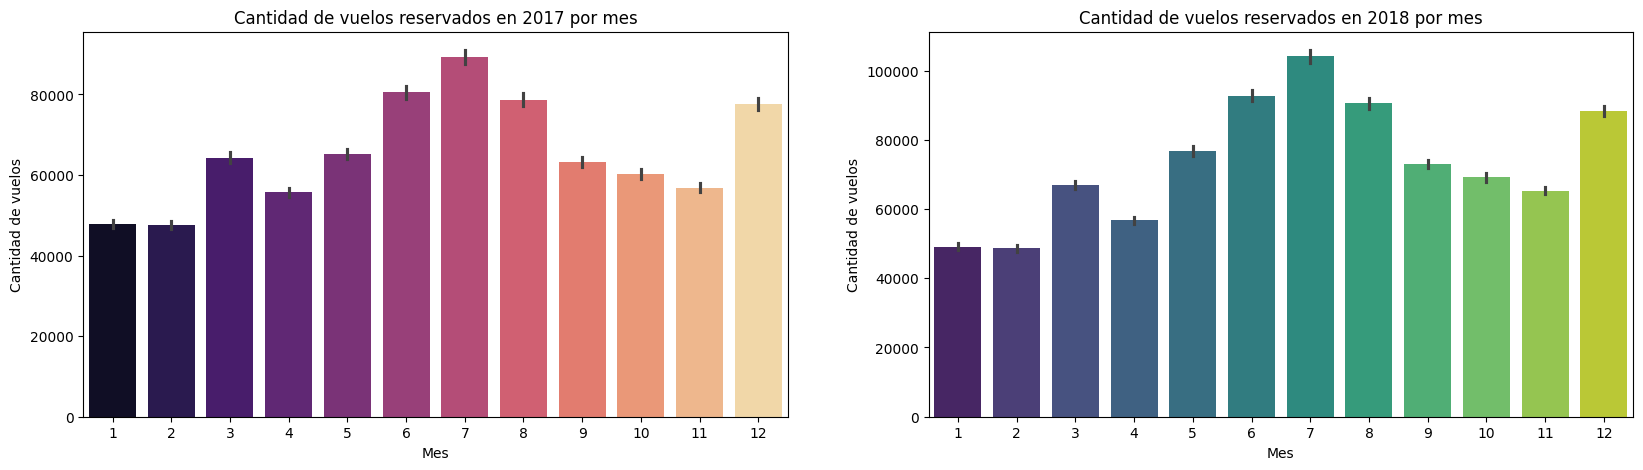

In [50]:
# Creo una base para las dos gráficas:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Insertar los datos:

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = df2017,
            ax = axes[0], # indico en que eje quiero posicionarlo
            estimator="sum", # para sacar la cantidad de vuelos reservados cada mes
            palette = "magma")

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = df2018,
            ax = axes[1], # indico en que eje quiero posicionarlo
            estimator="sum", # para sacar la cantidad de vuelos reservados cada mes
            palette = "viridis")

# Insertar título y título de ejes:

    ## 2017

axes[0].set_title("Cantidad de vuelos reservados en 2017 por mes")

axes[0].set_xlabel("Mes")

axes[0].set_ylabel("Cantidad de vuelos")

    ## 2018

axes[1].set_title("Cantidad de vuelos reservados en 2018 por mes")

axes[1].set_xlabel("Mes")

axes[1].set_ylabel("Cantidad de vuelos");

Se puede ver que la tendencia es similar a lo largo de los meses, pero en 2018 se ha aumentado la cantidad de ventas

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Vamos a utilizar un Regplot para identificar la relación entre dos variables

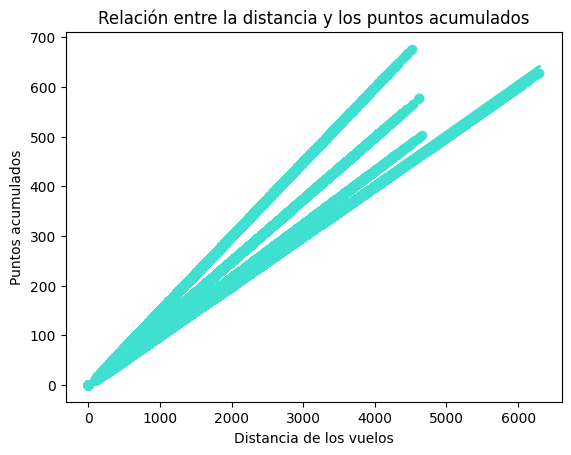

In [51]:
sns.regplot(x = "distance", 
            y = "points_accumulated", 
            data = df, 
            color = "turquoise")

# Título de los ejes:

plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")

# Título de la gráfica:
plt.title("Relación entre la distancia y los puntos acumulados");

Se puede observar que hay una correlación entre las dos variables, ya que a más distancia, más puntos se acumulan.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


Voy a utilizar un Countplot para sacar la frecuencia (Nº de clientes) de cada Provincia

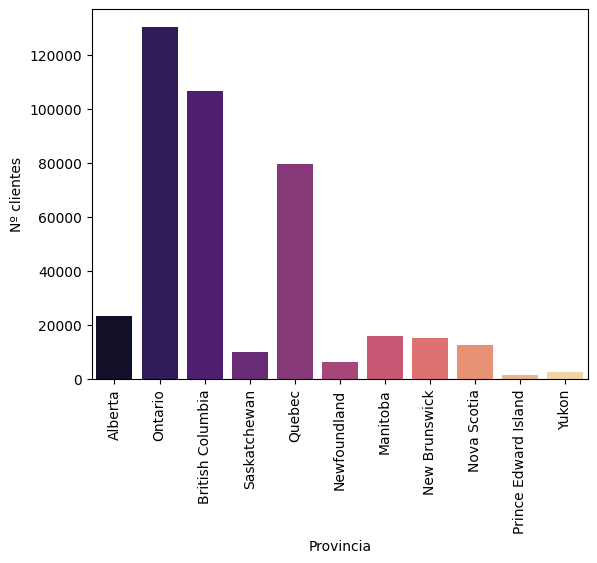

In [63]:
sns.countplot(x = "province", 
              data = df,
              palette = "magma")

# Giro las etiquetas del eje x para que no se superpongan:
plt.xticks(rotation = 90)

# Título de los ejes:
plt.xlabel("Provincia")
plt.ylabel("Nº clientes");

Se puede ver que la mayoría de clientes son de Ontario y donde menos clientes hay es en Prince Edward Island.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


Voy a utilizar un Barplot para ver la cantidad de salario promedio por cada nivel educativo

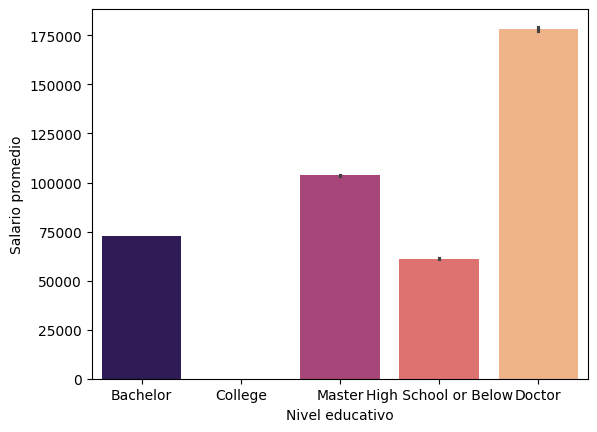

In [64]:
sns.barplot(x = "education", 
            y = "salary", 
            data = df,
            palette = "magma")

plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio");

En College no sale salario promedio ya que cuando hice la gestión de nulos sustituí todos los valores por 0.

Por lo que se puede observar en la gráfica, el mayor salario es en la categoría "Doctor" y el menor salario en "High School".

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


Voy a utilizar un Pieplot para mostrar la proporción de clientes por cada tipo de tarjeta

In [66]:
# Creo un DataFrame para sacar el total de clientes por cada tarjeta de fidelidad:

df_card = df.groupby("loyalty_card")["loyalty_number"].count().reset_index()

df_card

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


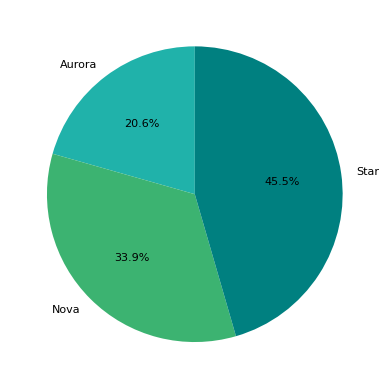

In [72]:
colores = ["lightseagreen", "mediumseagreen", "teal", "turquoise"]

plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_card, 
        autopct=  '%1.1f%%',
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

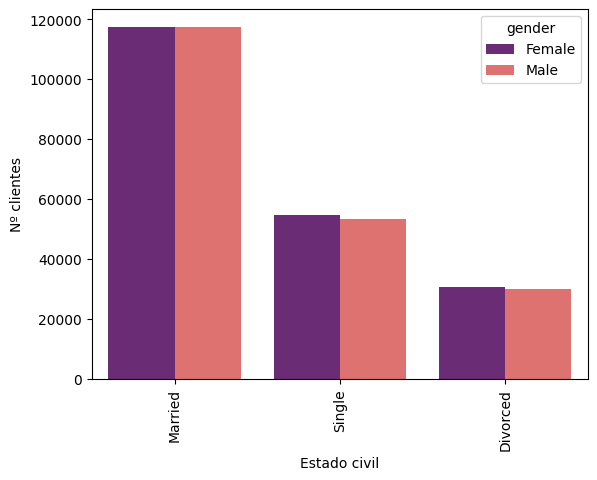

In [73]:
sns.countplot(x = "marital_status", 
              data = df, 
              palette = "magma", 
              hue = "gender")

# Giro las etiquetas:
plt.xticks(rotation = 90)

# Título ejes:
plt.xlabel("Estado civil")
plt.ylabel("Nº clientes");

Con esta gráfica podemos observar que la mayoría de clientes están casados.